<a href="https://colab.research.google.com/github/abhinavvmukerji/Flower-image-classification-and-data-augmentation/blob/main/cnn_flower_image_classification_data_augmentations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#we will build a CNN to classify flower images. We will also see how our model overfits and how overfitting can be addressed using data augmentation. 
#Data augmentation is a process of generating new training samples from current training dataset using transformations such as zoom, rotations, change in contrast etc
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
#We will download flowers dataset from google website and store it locally. In below call it downloads the zip file (.tgz) in cache_dir which is . meaning the current folder

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228827136/228813984 [==============================] - 1s 0us/step


In [ ]:
data_dir


'./datasets/flower_photos'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/tulips/16506668270_b823935dc3.jpg'),
 PosixPath('datasets/flower_photos/tulips/2249756775_02e693beda_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/17159349572_c0c51599f7_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/574373182_2776669a79_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/3282751630_45c2665034_m.jpg')]

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [ ]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/4918137796_21f0922b0c_n.jpg'),
 PosixPath('datasets/flower_photos/roses/14408977935_a397e796b8_m.jpg'),
 PosixPath('datasets/flower_photos/roses/14172324538_2147808483_n.jpg'),
 PosixPath('datasets/flower_photos/roses/19823402005_2db025dd66_m.jpg'),
 PosixPath('datasets/flower_photos/roses/218630974_5646dafc63_m.jpg')]

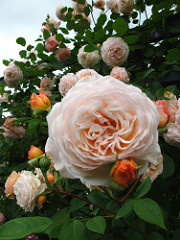

In [ ]:
PIL.Image.open(str(roses[1]))


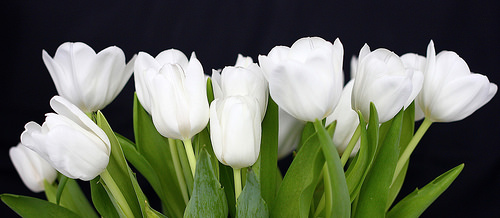

In [ ]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [ ]:
#Read flowers images from disk into numpy array using opencv
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [ ]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [ ]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/4918137796_21f0922b0c_n.jpg'),
 PosixPath('datasets/flower_photos/roses/14408977935_a397e796b8_m.jpg'),
 PosixPath('datasets/flower_photos/roses/14172324538_2147808483_n.jpg'),
 PosixPath('datasets/flower_photos/roses/19823402005_2db025dd66_m.jpg'),
 PosixPath('datasets/flower_photos/roses/218630974_5646dafc63_m.jpg')]

In [ ]:
str(flowers_images_dict['roses'][0])


'datasets/flower_photos/roses/4918137796_21f0922b0c_n.jpg'

In [ ]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
#cv2 takes path location in th form of a string

In [ ]:
img.shape   #cv2 interprets images in the form of a 3d matrix. X, Y and the RGB channel.


(240, 320, 3)

In [ ]:
cv2.resize(img,(180,180)).shape


(180, 180, 3)

In [ ]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])   #the corresponding value of a flower from dictionary gets appended in the Y list.


In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)  #the random_state parameter is used for initializing the internal random number generator, 
                                                                           #which will decide the splitting of data into train and test indices in your case.

In [ ]:
#Preprocessing: scale images
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
#Build convolutional neural network and train it
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),     #here we have 16 filters, and size of each filter is 3x3
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),   #till this point we have 2d layers
  layers.Flatten(),        #now we have 1d array
  layers.Dense(128, activation='relu'),      #128 neurons in internal hidden layer
  layers.Dense(num_classes)                  #num classes is 5 because we have 5 types of flowers, here we did not specify activation function so it is linear activation fn.
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)  

Epoch 1/30
86/86 [==============================] - 67s 766ms/step - loss: 1.3658 - accuracy: 0.4317
Epoch 2/30
86/86 [==============================] - 65s 754ms/step - loss: 0.9990 - accuracy: 0.6126
Epoch 3/30
86/86 [==============================] - 65s 750ms/step - loss: 0.8204 - accuracy: 0.6900
Epoch 4/30
86/86 [==============================] - 65s 753ms/step - loss: 0.6198 - accuracy: 0.7703
Epoch 5/30
86/86 [==============================] - 65s 753ms/step - loss: 0.4292 - accuracy: 0.8463
Epoch 6/30
86/86 [==============================] - 65s 760ms/step - loss: 0.2545 - accuracy: 0.9128
Epoch 7/30
86/86 [==============================] - 65s 759ms/step - loss: 0.1424 - accuracy: 0.9564
Epoch 8/30
86/86 [==============================] - 65s 761ms/step - loss: 0.0765 - accuracy: 0.9786
Epoch 9/30
86/86 [==============================] - 65s 754ms/step - loss: 0.0403 - accuracy: 0.9906
Epoch 10/30
86/86 [==============================] - 67s 785ms/step - loss: 0.0708 - accura

In [ ]:
model.evaluate(X_test_scaled,y_test)


29/29 [==============================] - 8s 258ms/step - loss: 2.3372 - accuracy: 0.6558


[2.337193727493286, 0.655773401260376]

In [ ]:
#Here we see that while train accuracy is very high (99%), 
#the test accuracy is significantly low (65.58%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting
predictions = model.predict(X_test_scaled)
predictions   #the predictions are such varied numbers because the activation fn we did not specify and it took linear activation automatically as default one.

array([[ 5.093893  ,  3.171368  ,  0.3696737 , -2.391926  ,  2.4816332 ],
       [20.151667  ,  3.7097316 , -7.272042  , -8.716278  , 14.007087  ],
       [ 4.1101775 ,  1.8825941 , -1.6273081 , -0.2836979 ,  4.771848  ],
       ...,
       [-1.8338546 ,  0.79587525, -1.5776794 ,  8.853114  ,  4.434856  ],
       [21.419027  , -2.1464527 , -4.661615  , -5.203507  ,  9.384672  ],
       [-0.29251844,  1.3852266 , -0.7269169 ,  6.78834   , -1.0976506 ]],
      dtype=float32)

In [ ]:
score = tf.nn.softmax(predictions[1])


In [ ]:
np.argmax(score)


0

In [ ]:
y_test[1]


0

In [ ]:
#Improve Test Accuracy Using Data Augmentation
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

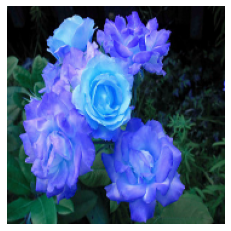

In [ ]:

plt.axis('off')   #so that x and y axis are not shown when we are seeing the output
plt.imshow(X[0])

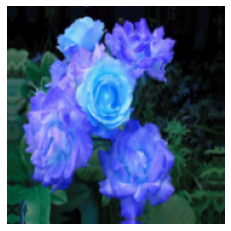

In [ ]:

plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [ ]:
#Train the model using data augmentation and a drop out layer
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30) 

Epoch 1/30
86/86 [==============================] - 86s 981ms/step - loss: 1.2453 - accuracy: 0.4706
Epoch 2/30
86/86 [==============================] - 81s 947ms/step - loss: 1.0080 - accuracy: 0.6032
Epoch 3/30
86/86 [==============================] - 80s 933ms/step - loss: 0.9024 - accuracy: 0.6504
Epoch 4/30
86/86 [==============================] - 83s 970ms/step - loss: 0.8379 - accuracy: 0.6806
Epoch 5/30
86/86 [==============================] - 82s 952ms/step - loss: 0.7968 - accuracy: 0.6900
Epoch 6/30
86/86 [==============================] - 83s 968ms/step - loss: 0.7230 - accuracy: 0.7249
Epoch 7/30
86/86 [==============================] - 83s 967ms/step - loss: 0.6722 - accuracy: 0.7427
Epoch 8/30
86/86 [==============================] - 84s 974ms/step - loss: 0.6488 - accuracy: 0.7562
Epoch 9/30
86/86 [==============================] - 81s 938ms/step - loss: 0.5898 - accuracy: 0.7722
Epoch 10/30
86/86 [==============================] - 80s 936ms/step - loss: 0.5528 - accura

In [ ]:
model.evaluate(X_test_scaled,y_test)


29/29 [==============================] - 8s 253ms/step - loss: 1.3050 - accuracy: 0.7037


[1.3049997091293335, 0.7037037014961243]

In [ ]:
#You can see that by using data augmentation and drop out layer the accuracy of test set predictions is increased to 70.37%